In [28]:
import numpy as np
import os
import io
import PIL
import PIL.Image
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.layers import *
import numpy as np 
import cv2 
import os

In [29]:
train_dataset = tf.keras.utils.image_dataset_from_directory("/home/wilhelm/Documents/GitHub/r2d2research/sua/Dataset/train",
                                      batch_size= 10, shuffle = True, image_size=(420,420))

Found 131 files belonging to 3 classes.


In [30]:
validation_dataset = tf.keras.utils.image_dataset_from_directory("/home/wilhelm/Documents/GitHub/r2d2research/sua/Dataset/Test",
                                                          batch_size=50, image_size=(420,420))

Found 15 files belonging to 3 classes.


In [31]:
train_dataset.class_names
class_names = train_dataset.class_names
print(class_names)

['Good_Bicep_Curl', 'Too_Fast', 'Too_Slow']


In [32]:
data_augmentation = tf.keras.Sequential(
  [
    tf.keras.layers.RandomFlip("horizontal",input_shape=(420,420,3)),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(0.1),
    tf.keras.layers.RandomRotation(0.2)
  ]
)

best_callbacks = [tf.keras.callbacks.EarlyStopping(patience = 1000) ,
                 tf.keras.callbacks.ModelCheckpoint(filepath="/home/wilhelm/Documents/GitHub/r2d2research/sua",monitor="val_accuracy",
                    save_best_only=True,
                    save_weights_only=False,
                    mode="auto",
                    save_freq="epoch",)]

In [33]:
class ConvBlock(tf.keras.Model):
    def __init__(self, num_filters, kernel_size=(3, 3)):
        super(ConvBlock, self).__init__()
        self.conv = Conv2D(num_filters, kernel_size)
        self.bn = BatchNormalization()
        self.elu = Activation("elu")
        self.pooling = MaxPool2D((2, 2))

    def call(self, x, pool=True):
        y = self.conv(x)
        x = self.bn(y)
        x = self.elu(x)
        x = Add()([x,y])
        x = self.elu(x)
        if pool == True:
            x = self.pooling(x)
            
        return x

def build_model(input_shape):
    inputs = Input(input_shape)
    inputs = data_augmentation(inputs)
    x = ConvBlock(32)(inputs)
    x = ConvBlock(64)(x)
    x = ConvBlock(128)(x, pool=False)
    x = ConvBlock(128)(x, pool=False)
    x = GlobalAveragePooling2D()(x)
    x = Dropout(0.2)(x)
    x = Dense(4, activation="softmax")(x)
    
    model = tf.keras.models.Model(inputs, x)
    return model

In [34]:
model = build_model((420,420, 3))

In [35]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=(0.001),
                                                 beta_1=(0.9),
                                                 beta_2=(0.999),
                                                 epsilon=(1e-7),),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [36]:
model.fit = model.fit(train_dataset,epochs=150, 
                      validation_data=validation_dataset, 
                      shuffle=True,
                      callbacks=best_callbacks )

Epoch 1/150
14/14 [==============================] - ETA: 0s - loss: 18.1919 - accuracy: 0.3588

2022-06-15 22:04:09.438341: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 335470080 exceeds 10% of free system memory.
2022-06-15 22:04:09.541686: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 335470080 exceeds 10% of free system memory.


INFO:tensorflow:Assets written to: /home/wilhelm/Documents/GitHub/r2d2research/sua/assets
14/14 [==============================] - 35s 2s/step - loss: 18.1919 - accuracy: 0.3588 - val_loss: 24.2488 - val_accuracy: 0.3333
Epoch 2/150
14/14 [==============================] - ETA: 0s - loss: 2.6850 - accuracy: 0.3206

2022-06-15 22:04:47.989439: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 335470080 exceeds 10% of free system memory.
2022-06-15 22:04:48.104613: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 335470080 exceeds 10% of free system memory.


14/14 [==============================] - 36s 3s/step - loss: 2.6850 - accuracy: 0.3206 - val_loss: 2.4528 - val_accuracy: 0.3333
Epoch 3/150
14/14 [==============================] - ETA: 0s - loss: 1.2881 - accuracy: 0.3817

2022-06-15 22:05:25.280876: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 335470080 exceeds 10% of free system memory.


14/14 [==============================] - 37s 3s/step - loss: 1.2881 - accuracy: 0.3817 - val_loss: 4.8899 - val_accuracy: 0.3333
Epoch 4/150
14/14 [==============================] - 39s 3s/step - loss: 1.2255 - accuracy: 0.4122 - val_loss: 0.9796 - val_accuracy: 0.5333
Epoch 5/150
14/14 [==============================] - 36s 3s/step - loss: 1.1382 - accuracy: 0.4504 - val_loss: 1.4639 - val_accuracy: 0.5333
Epoch 6/150
14/14 [==============================] - 37s 3s/step - loss: 1.0748 - accuracy: 0.5344 - val_loss: 1.0470 - val_accuracy: 0.4667
Epoch 7/150
14/14 [==============================] - 37s 3s/step - loss: 1.0322 - accuracy: 0.5344 - val_loss: 2.4636 - val_accuracy: 0.4667
Epoch 8/150
14/14 [==============================] - 37s 3s/step - loss: 0.9926 - accuracy: 0.5496 - val_loss: 1.1858 - val_accuracy: 0.4667
Epoch 9/150
14/14 [==============================] - 37s 3s/step - loss: 1.0805 - accuracy: 0.4885 - val_loss: 1.0749 - val_accuracy: 0.5333
Epoch 10/150
14/14 [=====

14/14 [==============================] - 37s 3s/step - loss: 0.1499 - accuracy: 0.9618 - val_loss: 0.2043 - val_accuracy: 0.9333
Epoch 54/150
14/14 [==============================] - 37s 3s/step - loss: 0.1944 - accuracy: 0.9389 - val_loss: 0.1877 - val_accuracy: 0.9333
Epoch 55/150
14/14 [==============================] - 39s 3s/step - loss: 0.1431 - accuracy: 0.9542 - val_loss: 0.0599 - val_accuracy: 1.0000
Epoch 56/150
14/14 [==============================] - 37s 3s/step - loss: 0.0866 - accuracy: 0.9618 - val_loss: 0.0401 - val_accuracy: 1.0000
Epoch 57/150
14/14 [==============================] - 37s 3s/step - loss: 0.1228 - accuracy: 0.9695 - val_loss: 0.3308 - val_accuracy: 0.8667
Epoch 58/150
14/14 [==============================] - 37s 3s/step - loss: 0.1295 - accuracy: 0.9618 - val_loss: 0.0996 - val_accuracy: 1.0000
Epoch 59/150
14/14 [==============================] - 37s 3s/step - loss: 0.1193 - accuracy: 0.9466 - val_loss: 0.1958 - val_accuracy: 0.9333
Epoch 60/150
14/14 

14/14 [==============================] - 37s 3s/step - loss: 0.0166 - accuracy: 0.9924 - val_loss: 0.0140 - val_accuracy: 1.0000
Epoch 110/150
14/14 [==============================] - 37s 3s/step - loss: 0.0141 - accuracy: 1.0000 - val_loss: 0.0751 - val_accuracy: 0.9333
Epoch 111/150
14/14 [==============================] - 37s 3s/step - loss: 0.0411 - accuracy: 0.9771 - val_loss: 0.0270 - val_accuracy: 1.0000
Epoch 112/150
14/14 [==============================] - 37s 3s/step - loss: 0.0846 - accuracy: 0.9771 - val_loss: 0.0581 - val_accuracy: 1.0000
Epoch 113/150
14/14 [==============================] - 37s 3s/step - loss: 0.0390 - accuracy: 0.9847 - val_loss: 0.0147 - val_accuracy: 1.0000
Epoch 114/150
14/14 [==============================] - 37s 3s/step - loss: 0.0190 - accuracy: 0.9924 - val_loss: 0.0018 - val_accuracy: 1.0000
Epoch 115/150
14/14 [==============================] - 37s 3s/step - loss: 0.0111 - accuracy: 1.0000 - val_loss: 0.0141 - val_accuracy: 1.0000
Epoch 116/150

In [37]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 420, 420, 3)]     0         
                                                                 
 conv_block_8 (ConvBlock)    (None, 209, 209, 32)      1024      
                                                                 
 conv_block_9 (ConvBlock)    (None, 103, 103, 64)      18752     
                                                                 
 conv_block_10 (ConvBlock)   (None, 101, 101, 128)     74368     
                                                                 
 conv_block_11 (ConvBlock)   (None, 99, 99, 128)       148096    
                                                                 
 global_average_pooling2d_2   (None, 128)              0         
 (GlobalAveragePooling2D)                                        
                                                           

In [38]:
best_model_path = "/home/wilhelm/Documents/GitHub/r2d2research/sua/"

best_model = tf.keras.models.load_model(best_model_path)

test_loss, test_acc = best_model.evaluate(validation_dataset)
print(test_acc)
y_prob = best_model.predict(validation_dataset)
y_classes = y_prob.argmax(axis=-1)
print(y_classes)
print( y_prob.argmax(axis=1)[1])

1/1 [==============================] - 1s 1s/step - loss: 0.0599 - accuracy: 1.0000
1.0
[2 1 0 2 1 1 1 2 1 0 2 0 0 2 0]
1


/home/wilhelm/Documents/GitHub/r2d2research/sua/Validationset//s4.png


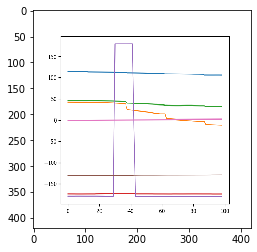

[2]
/home/wilhelm/Documents/GitHub/r2d2research/sua/Validationset//s1.png


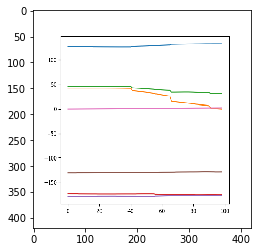

[2]
/home/wilhelm/Documents/GitHub/r2d2research/sua/Validationset//s2.png


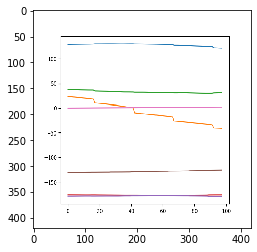

[2]
/home/wilhelm/Documents/GitHub/r2d2research/sua/Validationset//g4.png


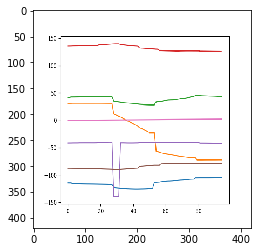

[0]
/home/wilhelm/Documents/GitHub/r2d2research/sua/Validationset//f4.png


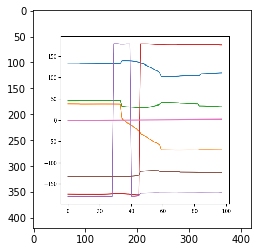

[1]
/home/wilhelm/Documents/GitHub/r2d2research/sua/Validationset//g2.png


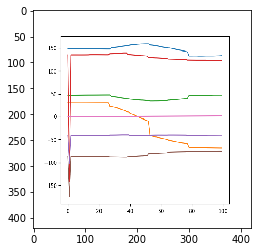

[0]
/home/wilhelm/Documents/GitHub/r2d2research/sua/Validationset//f5.png


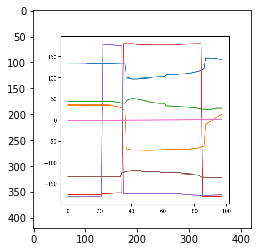

[2]
/home/wilhelm/Documents/GitHub/r2d2research/sua/Validationset//g1.png


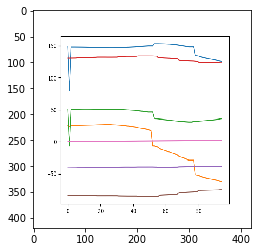

[0]
/home/wilhelm/Documents/GitHub/r2d2research/sua/Validationset//f3.png


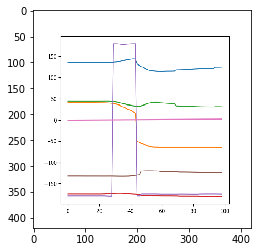

[1]
/home/wilhelm/Documents/GitHub/r2d2research/sua/Validationset//g5.png


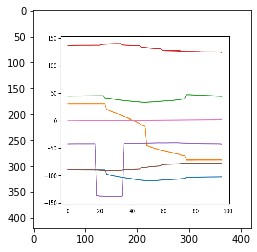

[0]
/home/wilhelm/Documents/GitHub/r2d2research/sua/Validationset//s5.png


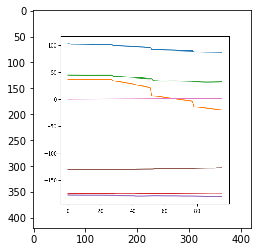

[2]
/home/wilhelm/Documents/GitHub/r2d2research/sua/Validationset//s3.png


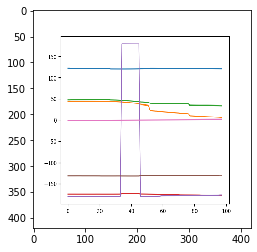

[2]
/home/wilhelm/Documents/GitHub/r2d2research/sua/Validationset//g3.png


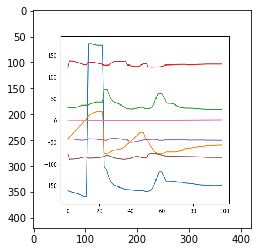

[0]
/home/wilhelm/Documents/GitHub/r2d2research/sua/Validationset//f2.png


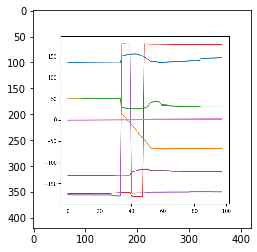

[1]
/home/wilhelm/Documents/GitHub/r2d2research/sua/Validationset//f1.png


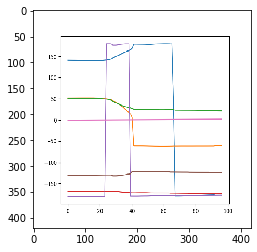

[1]


In [39]:
dir_path = "/home/wilhelm/Documents/GitHub/r2d2research/sua/Validationset"

for i in os.listdir(dir_path):
    img = tf.keras.preprocessing.image.load_img(dir_path+"//" + i, target_size=(420,420))
    print(dir_path+"//" + i)
    plt.imshow(img)
    plt.show()
    
    x = tf.keras.preprocessing.image.img_to_array(img)
    x = np.expand_dims(x,axis=0)
    images = np.vstack([x])
    val = best_model.predict(images)
    print( val.argmax(axis=1))

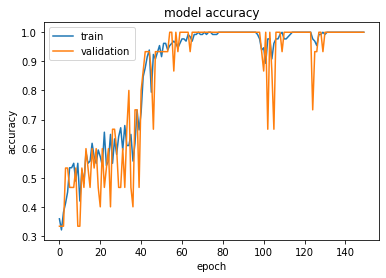

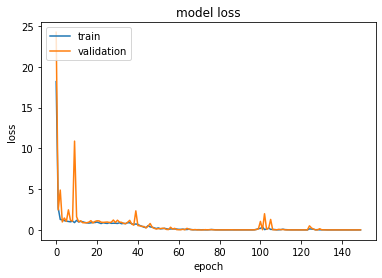

In [40]:
xError = np.array(model.fit.history['accuracy'])
yError = np.array(model.fit.history['val_accuracy'])

plt.plot(model.fit.history['accuracy'])
plt.plot(model.fit.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

plt.plot(model.fit.history['loss'])
plt.plot(model.fit.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
